## 3. Distribuciones

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
dataset = pandas.read_csv('hfi_cc_2018.csv')

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
w_dataset = dataset[important_cols]
w_dataset.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


### 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

In [47]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [48]:
## Filtro por hf_score remuevo los valores NaN
hf_score_cleaned = w_dataset['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_cleaned.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [36]:
## Filtro Latam por region Latinoamerica y Caribe
latam = w_dataset[w_dataset['region'] == 'Latin America & the Caribbean']
## Filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned = latam['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned.describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [51]:
## Filtro Latam por hf_score y remuevo valores NaN
hf_score_latam_cleaned = latam['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_latam_cleaned.describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *pf_identity***

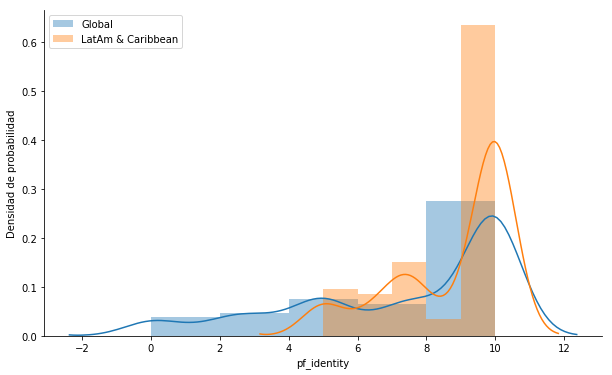

In [64]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global 
seaborn.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
seaborn.distplot(pf_identity_latam_cleaned, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**- Histograma de Distribucion de la variable *hf_score***

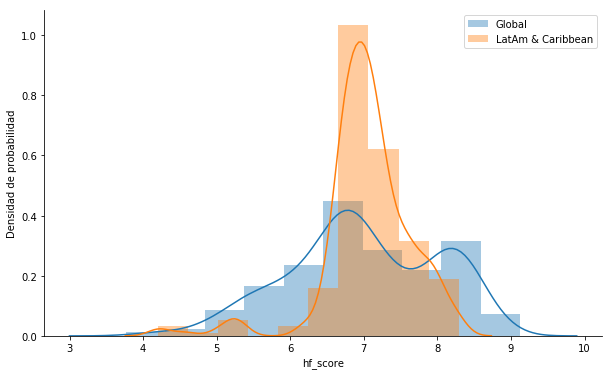

In [69]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned, kde=True, bins=10, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

In [9]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

**1. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

Parecería ser de distribucion Normal: mas sesgada en el caso de pf_identity. Mientras que en el caso de hf_score, la curva se asemeja más a una campana de Gauss "clásica". Lo que salta a la vista tras ver las los graficos es como si existiera una superposicion de 2 o más gaussianas, lo que insentiva a indagar un poco mas profundo en los registros. Se propone, entonces, presentar un par de nuevos graficos con los puntajes de cada pais de Latinoamerica y El Caribe y analizar así cuales de ellos son los responsables de "deformar" la curva normal clasica.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

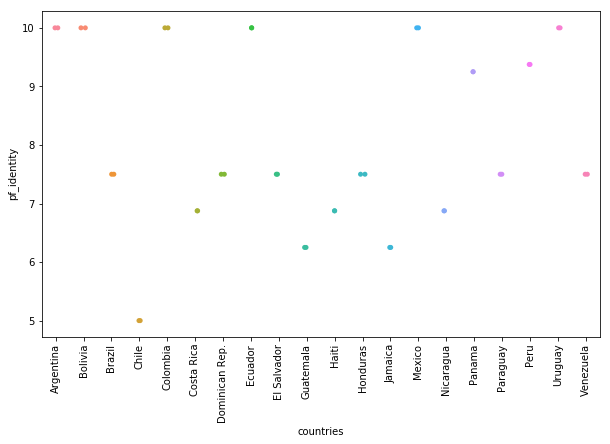

In [10]:
# Stripplot de la variable "pf_identity" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.stripplot(data=latam.dropna(), x="countries", y="pf_identity", jitter=True)
plt.xticks(rotation=90)
#plt.ylim([0,10])

Podemos observar como los paises se dividen en un grupo que poseen puntaje alto, otros puntaje medio, quedando Chile como outlier. Esto se corresponde con los 3 "picos" que vemos en el grafico de distribucion. No podriamos dejar pasar el analisis de este grafico no sin antes comentar que resulta llamativo el hecho que Chile se encuentre tan alejado, en terminos de pf_identity, de paises como Uruguay y Argentina, que comparten estilos de vida similares.

(0, 10)

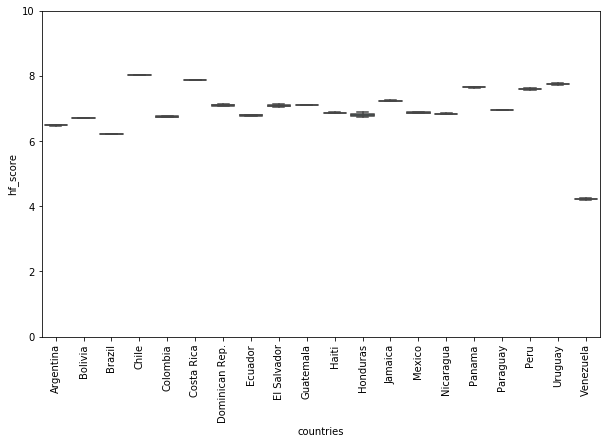

In [11]:
## Boxplot de la variable "hf_score" para LatAm y el Caribe
plt.figure(figsize=(10,6))
seaborn.boxplot(data=latam.dropna(), x="countries", y="hf_score")
plt.xticks(rotation=90)
plt.ylim([0,10])

En este caso, vemos como Venezuela esta claramente lejos del resto de los paises, correspondiendose con el "pico" mas bajo que vemos en el grafico de distribucion (la interpretacion que se le da esto es la dificil situacion socioeconomica que atraviesa el pais, especialmente desde el 2014).

Luego la gran mayoria de los paises se focalizan en valores medios-altos (el "pico" central) y vemos otra vez a Chile, esta vez acompañado por Uruguay, Costa Rica, Panama y Peru, como poseen valores ligeramente por encima de la media, haciendo referencia de esta forma al pequeño abultamiento que vemos en la cola del gráfico de distribucion. Con respecto a los valores que posee Chile y Uruguay podemos llegar a suponer que se debe a que atraviesan un buen pasar económico y social, sin embargo no hace falta ser un sociólogo o politólogo para saber que tal vez no es tan asi como lo muestran dichos valores; por lo que podemos suponer que no representan la realidad de forma demasiado acertada. El hecho que Costa Rica, Panamá y Perú acompañen a nuestros paises vecinos recien nombrados no hace mas que incrementar nuestras sospechas de que los valores de hf_score de nuestra muestras no son muy de fiar.

Dado estos resultados, y ratificando los deducido en los items 1 y 2 de este práctico, se decide entonces volver a presentar los graficos de distribucion pero tomando las siguientes medidas:
- En el caso de Latinoamerica y el Caribe:
    - Se decide exlcuir a Chile para los siguientes analisis sobre pf_identity.
    - Se decide excluir a Venezuela, Chile, Costa Rica, Panama y Peru para los siguientes analisis sobre hf_score.
- En el caso del resto del mundo:
    - Se decide excluir a Iran, Siria, Libia, Yemen y Venezuela para los siguientes analisis sobre hf_score.

In [57]:
## Excluyo Chile, filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned_wo_outliers = latam[latam.countries != "Chile"]['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned_wo_outliers.describe()

count    223.000000
mean       8.789985
std        1.687146
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [71]:
## Excluyo Venezuela, Chile, Costa Rica, Panama y Peru, filtro por hf_score y remuevo valores NaN
hf_score_latam_cleaned_wo_outliers = latam[latam.countries != "Venezuela"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Chile"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Costa Rica"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Panama"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers[hf_score_latam_cleaned_wo_outliers.countries != "Peru"]
hf_score_latam_cleaned_wo_outliers = hf_score_latam_cleaned_wo_outliers['hf_score'].dropna()
hf_score_latam_cleaned_wo_outliers.describe()

count    187.000000
mean       7.009078
std        0.336987
min        6.207145
25%        6.768122
50%        6.995549
75%        7.177543
max        8.073788
Name: hf_score, dtype: float64

In [54]:
## Excluyo a Iran, Siria, Libia, Yemen y Venezuela, filtro por hf_score y remuevo valores NaN
hf_score_cleaned_wo_outliers = w_dataset[w_dataset.countries != "Iran"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Syria"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Libya"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Yemen, Rep."]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers[hf_score_cleaned_wo_outliers.countries != "Venezuela"]
hf_score_cleaned_wo_outliers = hf_score_cleaned_wo_outliers['hf_score'].dropna()
hf_score_cleaned_wo_outliers.describe()

count    1340.000000
mean        7.055563
std         0.966867
min         4.258014
25%         6.413465
50%         6.954874
75%         7.931989
max         9.126313
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *pf_identity* sin outliers**

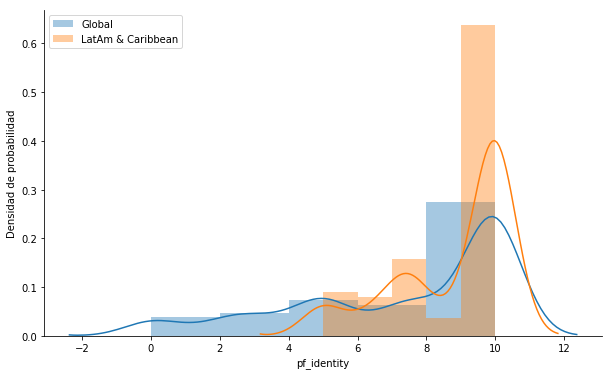

In [65]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global
seaborn.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
seaborn.distplot(pf_identity_latam_cleaned_wo_outliers, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()
plt.ylabel('Densidad de probabilidad')
plt.legend()


**- Histograma de Distribucion de la variable *hf_score* sin outliers**

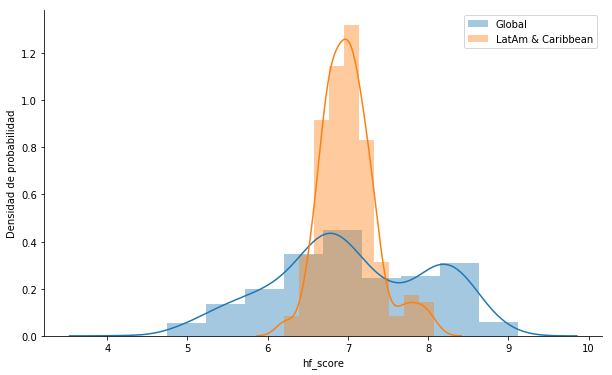

In [72]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned_wo_outliers, kde=True, bins=10, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned_wo_outliers, kde=True, bins=10, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**2. Prueba de Kolmogorov-Smirnof**



In [73]:
from scipy import stats
from sklearn import preprocessing
## Prueba de Kolmogorov-Smirnof para *pf_identity* (latam)
pf_identity_latam_cleaned_norm = preprocessing.scale(pf_identity_latam_cleaned_wo_outliers)
stats.kstest(pf_identity_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.3513149305705932, pvalue=4.0903176077573616e-25)

In [83]:
## Prueba de Kolmogorov-Smirnof para *hf_score* (latam)
hf_score_latam_cleaned_norm = preprocessing.scale(hf_score_latam_cleaned_wo_outliers)
#hf_score_latam_cleaned_norm.describe()
stats.kstest(hf_score_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.07232950693258844, pvalue=0.2693691087384836)

**3. Graficos QQ**

TODO -> RechaZO QUE ES NORMAL

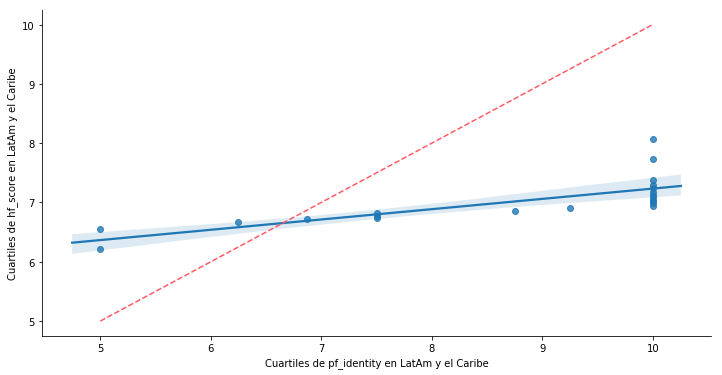

In [84]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos cuartiles igualmente distribuidos entre 0 y 100.
qn_pf_identity_latam_cleaned = numpy.percentile(pf_identity_latam_cleaned_wo_outliers, percs)
qn_hf_score_latam_cleaned = numpy.percentile(hf_score_latam_cleaned_wo_outliers, percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_pf_identity_latam_cleaned, y=qn_hf_score_latam_cleaned)
plt.xlabel('Cuartiles de pf_identity en LatAm y el Caribe')
plt.ylabel('Cuartiles de hf_score en LatAm y el Caribe')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((qn_pf_identity_latam_cleaned.min(),qn_hf_score_latam_cleaned.min())), numpy.max((qn_pf_identity_latam_cleaned.max(),qn_hf_score_latam_cleaned.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

Vemos que ambas distribuciones están relacionadas linealmente, dado que los puntos del gráfico QQ estan ligeramente alineados, aunque no en la dirección de la identidad. En este caso, como la tendencia del gráfico está por debajo de la identidad, la distribución del eje x (*pf_identity*) es más dispersa que la de *hf_score*

**4. Skew y Curtosis**

In [85]:
print("pf_identity_skew =", pf_identity_latam_cleaned_wo_outliers.skew())
print("pf_identity_kurtosis =", pf_identity_latam_cleaned_wo_outliers.kurtosis())

pf_identity_skew = -1.0815826729129905
pf_identity_kurtosis = -0.1851548259538962


In [86]:
print("hf_score_skew =", hf_score_latam_cleaned_wo_outliers.skew())
print("hf_score_kurtosis =", hf_score_latam_cleaned_wo_outliers.kurtosis())

hf_score_skew = 0.7540659843787029
hf_score_kurtosis = 1.1952226799663976


Como vemos, el valor de Skew es negativo en ambas distribuciones, denotando una asimetria, es decir, la cola de la distribución se alarga para valores inferiores a la media. Esto se ve claramente en los graficos de distribucion de ambas variables.

En lo que respecta a Kurtosis, vemos por un lado en el valor de pf_identity_kurtosis un numero pequeño,  implicando un cierto achatamiento de la campana de Gauss sobre la media. Comparando con el valor de hf_score_kurtosis si observamos en ambos gráficos de distribucion de pf_identity y el de hf_score, vemos contrariamente en este ultimo una mayor concentracion de valores sobre la media, lo cual se corresponde son su alto valor de Kurtosis (hf_score_kurtosis).

Relacionandolo con el grafico QQ...
El grafico QQ brinda...

